# Fire Detector Model


## Importing libraries

In [54]:
import os
import random
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image

## Data loading- preprocessing and sliting 

In [1]:
source_directory = './data/fire_dataset'
destination_directory = './data/fireDS'

In [2]:
train_ratio = 0.7  # 70% of data for training
val_ratio = 0.15  # 15% of data for validation
test_ratio = 0.15  # 15% of data for testing

In [5]:
train_directory = os.path.join(destination_directory, 'train')
val_directory = os.path.join(destination_directory, 'val')
test_directory = os.path.join(destination_directory, 'test')

os.makedirs(train_directory, exist_ok=True)
os.makedirs(val_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

In [8]:
for class_name in os.listdir(source_directory):
    class_directory = os.path.join(source_directory, class_name)
    if not os.path.isdir(class_directory):
        continue

    images = os.listdir(class_directory)
    random.shuffle(images)

    train_split = int(len(images) * train_ratio)
    val_split = int(len(images) * (train_ratio + val_ratio))

    train_images = images[:train_split]
    val_images = images[train_split:val_split]
    test_images = images[val_split:]

    for image in train_images:
        src_path = os.path.join(class_directory, image)
        dst_path = os.path.join(train_directory, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image in val_images:
        src_path = os.path.join(class_directory, image)
        dst_path = os.path.join(val_directory, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image in test_images:
        src_path = os.path.join(class_directory, image)
        dst_path = os.path.join(test_directory, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)


In [10]:
# Create an instance of ImageDataGenerator
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    
)

In [11]:
# Generate augmented images from a directory
train_generator = data_generator.flow_from_directory(
    train_directory,
    color_mode='rgb',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)
# Generate augmented images from a directory
val_generator = data_generator.flow_from_directory(
    val_directory,
    color_mode='rgb',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)
# Generate augmented images from a directory
test_generator = data_generator.flow_from_directory(
    test_directory,
    color_mode='rgb',
    target_size=(100,100),
    batch_size=32,
    class_mode='binary'
)

Found 698 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Found 151 images belonging to 2 classes.


## Model

In [20]:
mm=EfficientNetB3(include_top=False, input_shape=(100, 100, 3))

In [41]:
NUM_CLASSES = 1

model = Sequential()
model.add(mm)
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

model.layers[0].trainable = False


In [44]:

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 4, 4, 1536)       10783535  
                                                                 
 dropout_4 (Dropout)         (None, 4, 4, 1536)        0         
                                                                 
 flatten_2 (Flatten)         (None, 24576)             0         
                                                                 
 dropout_5 (Dropout)         (None, 24576)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 24577     
                                                                 
Total params: 10,808,112
Trainable params: 24,577
Non-trainable params: 10,783,535
_________________________________________________________________


In [45]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

Epoch 1/30
22/22 [==============================] - 47s 2s/step - loss: 0.2778 - accuracy: 0.8911 - val_loss: 0.0725 - val_accuracy: 0.9733
Epoch 2/30
22/22 [==============================] - 37s 2s/step - loss: 0.1283 - accuracy: 0.9499 - val_loss: 0.0966 - val_accuracy: 0.9533
Epoch 3/30
22/22 [==============================] - 39s 2s/step - loss: 0.1183 - accuracy: 0.9499 - val_loss: 0.0999 - val_accuracy: 0.9600
Epoch 4/30
22/22 [==============================] - 39s 2s/step - loss: 0.1104 - accuracy: 0.9599 - val_loss: 0.0456 - val_accuracy: 0.9800
Epoch 5/30
22/22 [==============================] - 37s 2s/step - loss: 0.1002 - accuracy: 0.9642 - val_loss: 0.0432 - val_accuracy: 0.9867
Epoch 6/30
22/22 [==============================] - 37s 2s/step - loss: 0.0914 - accuracy: 0.9699 - val_loss: 0.0513 - val_accuracy: 0.9800
Epoch 7/30
22/22 [==============================] - 40s 2s/step - loss: 0.0653 - accuracy: 0.9785 - val_loss: 0.0460 - val_accuracy: 0.9800
Epoch 8/30
22/22 [==

## Model evaluation

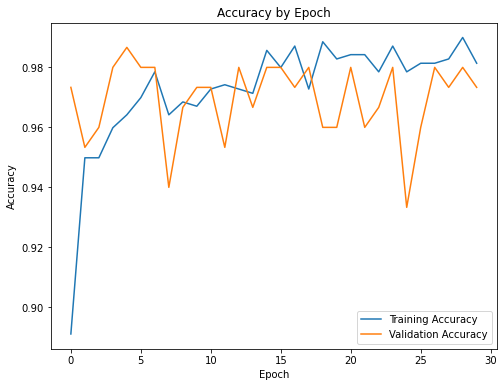

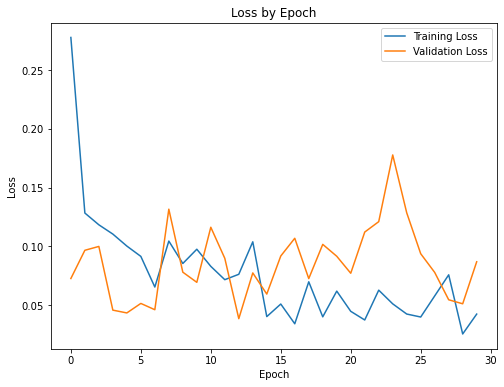

In [47]:
# Get the accuracy and loss values from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [48]:
# validate on val set
predictions = model.predict(test_generator)
predictions = [1 if x>0.5 else 0 for x in predictions]

5/5 [==============================] - 8s 1s/step


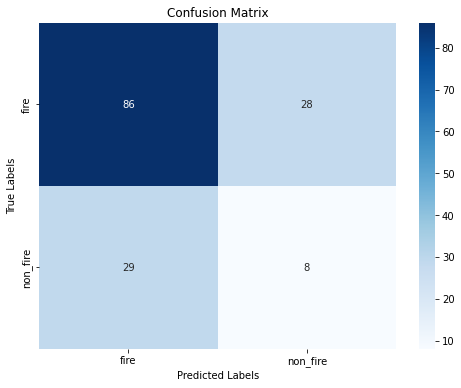

In [55]:
# Convert predictions to binary labels (0 or 1)
predictions = [1 if x > 0.5 else 0 for x in predictions]

# Get the true labels from the test_generator
true_labels = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Get class labels from the test_generator
class_labels = list(test_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Saving the model

In [61]:
# Save the entire model
#model.save('fire_model.h5')

# Save only the model weights
model.save_weights('fire_model_weights.h5')


## Prediction exemple

In [75]:
def predict(path):
    # Load and preprocess the input image
    img_path = path
    img = image.load_img(img_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    plt.imshow(img)
    plt.axis('off')  # Optional: turn off axis labels
    plt.show()

    # Make a prediction
    prediction = model.predict(x)
    fire_probability = prediction[0][0]

    # Determine the result
    if fire_probability >= 0.5:
        result = "No Fire detected."
    else:
        result = "fire detected."

    print("Result:", result)
    print("Fire Probability:", 1-fire_probability)

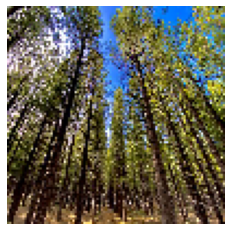

1/1 [==============================] - 0s 60ms/step
Result: No Fire detected.
Fire Probability: 0.01770949363708496


In [76]:
predict('./data/fire_dataset/no.jpg')

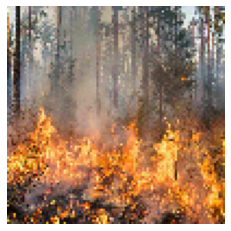

1/1 [==============================] - 0s 61ms/step
Result: fire detected.
Fire Probability: 0.999999984659965


In [77]:
predict('./data/fire_dataset/fir.jpg')

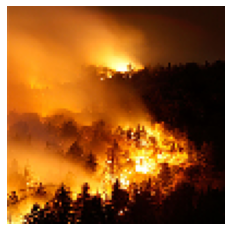

1/1 [==============================] - 0s 63ms/step
Result: fire detected.
Fire Probability: 0.9999613236286677


In [84]:
predict('./data/fire_dataset/fire40.png') #from the training data

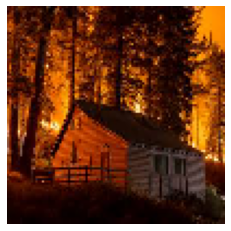

1/1 [==============================] - 0s 63ms/step
Result: No Fire detected.
Fire Probability: 0.00110548734664917


In [85]:
predict('./data/fire_dataset/ji.jpeg')

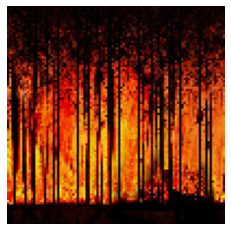

1/1 [==============================] - 0s 61ms/step
Result: No Fire detected.
Fire Probability: 0.44543659687042236


In [86]:
predict('./data/fire_dataset/m.jpg')